# Text Mining and Search

UniMiB 2022/23

**IMDB Reviews**

In [1]:
# initial imports

import io
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import joblib

Merge data - Train

In [ ]:
train_dataset = pd.DataFrame(columns=['text','sentiment'])

found = 0
for file in tqdm(os.listdir('../data/raw/train/neg/')):
  with io.open('../data/raw/train/neg/'+file, mode="r", encoding="utf-8") as f:
    text = f.read()
    train_dataset.loc[len(train_dataset)] = [text, 'NEG']
for file in tqdm(os.listdir('../data/raw/train/pos/')):
  with io.open('../data/raw/train/pos/'+file, mode="r", encoding="utf-8") as f:
    text = f.read()
    train_dataset.loc[len(train_dataset)] = [text, 'POS']
            

In [ ]:
train_dataset.to_csv('../data/train_dataset.csv')

Merge data - Test

In [ ]:
test_dataset = pd.DataFrame(columns=['text', 'sentiment'])

found = 0
for file in tqdm(os.listdir('../data/raw/test/neg/')):
  with io.open('../data/raw/test/neg/'+file, mode="r", encoding="utf-8") as f:
    text = f.read()
    test_dataset.loc[len(test_dataset)] = [text, 'NEG']
for file in tqdm(os.listdir('../data/raw/test/pos/')):
  with io.open('../data/raw/test/pos/'+file, mode="r", encoding="utf-8") as f:
    text = f.read()
    test_dataset.loc[len(test_dataset)] = [text, 'POS']


In [ ]:
test_dataset.to_csv('../data/test_dataset.csv')

Read data

In [ ]:
train = pd.read_csv('../data/train_dataset.csv')
train = train[['text', 'sentiment']]
train.head()

In [ ]:
test = pd.read_csv('../data/test_dataset.csv')
test = test[['text', 'sentiment']]
test.head()

### Text Pre-Processing

In [2]:
import string
import re

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

from preprocess import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
lemmatizer = WordNetLemmatizer()

def remove_numbers(text_to_preprocess):
    return re.sub(r'\d+', '', text_to_preprocess)


def remove_punctuation(text):
    return text[0].translate(str.maketrans('', '', string.punctuation))


def remove_stopwords(text):
    no_stopwords = ''
    for item in text.split():
      if item not in stopwords.words():
        no_stopwords+=' '+item
    return no_stopwords


def postagger(token_words):
    return nltk.pos_tag(token_words)


def remove_extra_whitespace(text):
    return " ".join(text.split())

def tokenizer(text):
  return word_tokenize(text)

def lemmatizer_function(tokenized_text):
  lemmatized_text= ''
  for token in tokenized_text:
    lemmatized = lemmatizer.lemmatize(token)
    lemmatized_text += ' '+lemmatized
  return lemmatized_text

def preprocess_text(text):
    text = text.str.lower()
    no_nums = remove_numbers(text),
    no_punct = remove_punctuation(no_nums)
    no_stopw = remove_stopwords(no_punct)
    no_whtspace = remove_extra_whitespace(no_stopw)
    tokenized = tokenizer(no_whtspace)
    lemmatized = lemmatizer_function(tokenized)
    return lemmatized

In [ ]:
import numpy as np
from multiprocessing import Pool
from preprocess import preprocess_loader
if __name__ == '__main__':
  df_split = np.array_split(train_ds, 10)
  pool = Pool(10)
  df = pd.concat(pool.map(preprocess_loader, df_split))
  pool.close()
  pool.join()

In [ ]:
tqdm.pandas()

train['preprocessed_text'] = train['text'].progress_apply(preprocess_text)
train.head()

In [ ]:
from bs4 import BeautifulSoup

# removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

### Data Exploration

In [3]:
train_pp = pd.read_csv('../data/preprocessed_train.csv')
train_pp = train_pp[['text', 'sentiment', 'preprocessed_text']]
train_pp.head()

,text,sentiment,preprocessed_text
0,Story of a man who has unnatural feelings for ...,NEG,story unnatural feeling pig start opening sce...
1,Airport '77 starts as a brand new luxury 747 p...,NEG,airport start brand luxury plane loaded valua...
2,This film lacked something I couldn't put my f...,NEG,film lacked put finger charisma part leading ...
3,"Sorry everyone,,, I know this is supposed to b...",NEG,sorry supposed art film wow handed gun screen...
4,When I was little my parents took me along to ...,NEG,parent theater interior movie watched parent ...


In [4]:
test_pp = pd.read_csv('../data/preprocessed_test.csv')
test_pp = test_pp[['text', 'sentiment', 'preprocessed_text']]
test_pp.head()

,text,sentiment,preprocessed_text
0,Once again Mr. Costner has dragged out a movie...,NEG,mr costner dragged movie longer terrific resc...
1,This is an example of why the majority of acti...,NEG,majority action film generic boring worth wat...
2,"First of all I hate those moronic rappers, who...",NEG,hate moronic rapper act gun pressed forehead ...
3,Not even the Beatles could write songs everyon...,NEG,beatles write song walter hill moptop he prov...
4,Brass pictures (movies is not a fitting word f...,NEG,brass picture movie fitting word brassy allur...


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# get the text and join all the reviews in training set
# creating the text variable
text = " ".join(cat for cat in train_pp.preprocessed_text)

# limit the word count and set the stopwords
wordcount = 500
stopwords = set(STOPWORDS)
stopwords.add("english")

# setup, generate and save the word cloud image to a file
wc = WordCloud(scale=5, 
               background_color="grey", 
               max_words=wordcount, 
               stopwords=stopwords)
wc.generate(text)
wc.to_file("../figures/WordCloud_train.png")

# show the wordcloud as output
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.axis("off")
plt.show()

In [ ]:
# get the text and join all the reviews in test set
# creating the text variable
text = " ".join(cat for cat in test_pp.preprocessed_text)

# limit the word count and set the stopwords
wordcount = 500
stopwords = set(STOPWORDS)
stopwords.add("english")

# setup, generate and save the word cloud image to a file
wc = WordCloud(scale=5, 
               background_color="grey", 
               max_words=wordcount, 
               stopwords=stopwords)
wc.generate(text)
wc.to_file("../figures/WordCloud_test.png")

# show the wordcloud as output
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.axis("off")
plt.show()

In [5]:
# print  number of unique words
print("Number of words: ")
print(len(np.unique(np.hstack(train_pp.preprocessed_text))))
print ()

# print the average review length
print("Average review length:")
result = [len(x) for x in train_pp.preprocessed_text]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))

Number of words: 
24902

Average review length:
Mean 685.01 words (545.460708)


In [6]:
# print  number of unique words
print("Number of words: ")
print(len(np.unique(np.hstack(test_pp.preprocessed_text))))
print ()

# print the average review length
print("Average review length:")
result = [len(x) for x in test_pp.preprocessed_text]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))

Number of words: 
24798

Average review length:
Mean 668.02 words (532.623695)


### Text Representation

In [7]:
from sklearn.feature_extraction.text import CountVectorizer      #-- Bag of Words
from sklearn.feature_extraction.text import TfidfVectorizer      #-- Tf-Idf

import joblib

In [8]:
text_preprocessed_train = train_pp['preprocessed_text']
text_preprocessed_test = test_pp['preprocessed_text']

Bag-of-Word (BoW)

In [9]:
vectorizer = CountVectorizer(ngram_range=(1,2),                                 #-- Uni-grams and Bi-grams
                             max_features = 25000)                              #-- Most 25000 frequent grams across the text

X_text_bow =  vectorizer.fit_transform(text_preprocessed_train).toarray()
y_text_bow =  vectorizer.transform(text_preprocessed_test).toarray()

In [10]:
print(X_text_bow.shape)
print(y_text_bow.shape)

(25000, 25000)
(25000, 25000)


In [11]:
joblib.dump(X_text_bow, 'processed_train_bow.save')

['processed_train_bow.save']

In [12]:
joblib.dump(y_text_bow, 'processed_test_bow.save')

['processed_test_bow.save']

Binary

In [ ]:
'''
text_preprocessed = train_pp['preprocessed_text']

vectorizer = CountVectorizer(binary = True, max_features = 25000)
X_text_binary =  vectorizer.fit_transform(text_preprocessed)
'''

In [ ]:
'''
print(X_text_bow.shape)
'''

In [ ]:
'''
import joblib
joblib.dump(X_text_bow, 'processed_train_binary_bow.save')
'''

TF-IDF

In [13]:
vectorizer = TfidfVectorizer(max_features=25000, ngram_range=(1, 2))

X_text_tfidf =  vectorizer.fit_transform(text_preprocessed_train).toarray()
y_text_tfidf =  vectorizer.transform(text_preprocessed_test).toarray()

In [14]:
print(X_text_tfidf.shape)
print(y_text_tfidf.shape)

(25000, 25000)
(25000, 25000)


In [15]:
joblib.dump(X_text_tfidf, 'processed_train_tfidf.save')

['processed_train_tfidf.save']

In [16]:
joblib.dump(y_text_tfidf, 'processed_test_tfidf.save')

['processed_test_tfidf.save']

### Text Classification

In [17]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import joblib
from sklearn.preprocessing import LabelEncoder

In [18]:
labels_train = train_pp['sentiment']

encoder = LabelEncoder()
encoder.fit(labels_train)
encoded_labels_train = encoder.transform(labels_train)

In [19]:
labels_test = test_pp['sentiment']

encoder = LabelEncoder()
encoder.fit(labels_test)
encoded_labels_test = encoder.transform(labels_test)

In [20]:
X_train_bow = joblib.load('processed_train_bow.save')
X_train_tfidf = joblib.load('processed_train_tfidf.save')

In [21]:
y_test_bow = joblib.load('processed_test_bow.save')
y_test_tfidf = joblib.load('processed_test_tfidf.save')

Support Vector Machines (SVM)

In [22]:
from sklearn.svm import LinearSVC

In [23]:
clf_bow = LinearSVC(C=0.001)

In [24]:
clf_bow.fit(X_text_bow, encoded_labels_train)

LinearSVC(C=0.001)

In [25]:
preds_bow = clf_bow.predict(y_text_bow)
print(classification_report(encoded_labels_test, preds_bow))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     12500
           1       0.86      0.87      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



In [26]:
clf_tfidf = LinearSVC(C=0.001)

In [27]:
clf_tfidf.fit(X_text_tfidf, encoded_labels_train)

LinearSVC(C=0.001)

In [28]:
preds_tfidf = clf_tfidf.predict(y_text_tfidf)
print(classification_report(encoded_labels_test, preds_tfidf))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80     12500
           1       0.79      0.83      0.81     12500

    accuracy                           0.81     25000
   macro avg       0.81      0.81      0.81     25000
weighted avg       0.81      0.81      0.81     25000



## Multi layer perceptron

In [29]:
import tensorflow as tf
from tensorflow.keras import layers
import scipy

TF-IDF

In [30]:
inputs = tf.keras.Input(shape=(25000))

x = layers.Dense(128, activation="relu")(inputs)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
prediction = layers.Dense(1, activation="sigmoid")(x)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='./checkpoint/best_model.h5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
model = tf.keras.Model(inputs, prediction)
model.compile(loss="binary_crossentropy",
              optimizer="adam", metrics=["accuracy"], )

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(
    X_text_tfidf, encoded_labels_train, test_size=0.2)

In [32]:
history = model.fit(X_train, Y_train, epochs=100,
          callbacks=[model_checkpoint_callback, callback], validation_data=(X_val, Y_val))

Epoch 1/100
625/625 [==============================] - 40s 60ms/step - loss: 0.3469 - accuracy: 0.8522 - val_loss: 0.2720 - val_accuracy: 0.8870
Epoch 2/100
625/625 [==============================] - 36s 57ms/step - loss: 0.0970 - accuracy: 0.9643 - val_loss: 0.3455 - val_accuracy: 0.8732
Epoch 3/100
625/625 [==============================] - 34s 55ms/step - loss: 0.0264 - accuracy: 0.9912 - val_loss: 0.5734 - val_accuracy: 0.8676
Epoch 4/100
625/625 [==============================] - 33s 53ms/step - loss: 0.0112 - accuracy: 0.9959 - val_loss: 0.7111 - val_accuracy: 0.8650


In [33]:
joblib.dump(history, './mlp_train_history.save')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\input_layer
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-02-02 21:43:26         2602
metadata.json                                  2023-02-02 21:43:26           64
variables.h5                                   2023-02-02 21:43:26     38555472


['./mlp_train_history.save']

In [34]:
model.save('./mlp_tfidf_save')


INFO:tensorflow:Assets written to: ./mlp_tfidf_save\assets


INFO:tensorflow:Assets written to: ./mlp_tfidf_save\assets


In [35]:
preds = model.predict(y_text_tfidf)

782/782 [==============================] - 5s 6ms/step


In [36]:
preds = np.round(preds)

In [37]:
predictions = []

for item in preds:
  predictions.append(int(item[0]))

In [38]:
print(classification_report(encoded_labels_test, preds))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83     12500
           1       0.85      0.79      0.82     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



BoW

In [39]:
inputs = tf.keras.Input(shape=(25000))

x = layers.Dense(128, activation="relu")(inputs)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
prediction = layers.Dense(1, activation="sigmoid")(x)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='./checkpoint/best_model_bow.h5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
model = tf.keras.Model(inputs, prediction)
model.compile(loss="binary_crossentropy",
              optimizer="adam", metrics=["accuracy"], )


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(
    X_text_bow, encoded_labels_train, test_size=0.2)

In [41]:
history = model.fit(X_train, Y_train, epochs=100,
                    callbacks=[model_checkpoint_callback, callback], validation_data=(X_val, Y_val))

Epoch 1/100
625/625 [==============================] - 39s 60ms/step - loss: 0.3547 - accuracy: 0.8497 - val_loss: 0.2992 - val_accuracy: 0.8770
Epoch 2/100
625/625 [==============================] - 34s 55ms/step - loss: 0.1013 - accuracy: 0.9610 - val_loss: 0.4528 - val_accuracy: 0.8674
Epoch 3/100
625/625 [==============================] - 34s 55ms/step - loss: 0.0241 - accuracy: 0.9918 - val_loss: 0.6694 - val_accuracy: 0.8672
Epoch 4/100
625/625 [==============================] - 36s 57ms/step - loss: 0.0114 - accuracy: 0.9973 - val_loss: 0.8257 - val_accuracy: 0.8724


In [42]:
joblib.dump(history, './mlp_train_history.save')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\input_layer
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-02-02 21:47:34         2610
metadata.json                                  2023-02-02 21:47:34           64
variables.h5                                   2023-02-02 21:47:35     38555472


['./mlp_train_history.save']

In [43]:
model.save('./mlp_bow_save')

INFO:tensorflow:Assets written to: ./mlp_bow_save\assets


INFO:tensorflow:Assets written to: ./mlp_bow_save\assets


In [44]:
model = tf.keras.models.load_model('./mlp_bow_save')
preds = model.predict(y_text_bow)
preds = np.round(preds)
predictions = []

for item in preds:
  predictions.append(int(item[0]))

print(classification_report(encoded_labels_test, preds))

782/782 [==============================] - 12s 15ms/step
              precision    recall  f1-score   support

           0       0.82      0.87      0.85     12500
           1       0.86      0.81      0.83     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression,SGDClassifier

In [46]:
# training the model
lr = LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)

# fitting the model for Bag of words
lr_bow = lr.fit(X_text_bow, encoded_labels_train)
print(lr_bow)

# fitting the model for tfidf features
lr_tfidf = lr.fit(X_text_tfidf, encoded_labels_train)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [47]:
# predicting the model for bag of words
lr_bow_predict = lr.predict(y_text_bow)
print(lr_bow_predict)

# predicting the model for tfidf features
lr_tfidf_predict = lr.predict(y_text_tfidf)
print(lr_tfidf_predict)

[0 0 0 ... 1 1 1]
[0 0 0 ... 1 1 1]


In [48]:
# accuracy score for bag of words
lr_bow_score = accuracy_score(encoded_labels_test, lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

# accuracy score for tfidf features
lr_tfidf_score = accuracy_score(encoded_labels_test, lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.85408
lr_tfidf_score : 0.86956


In [49]:
# classification report for bag of words 
lr_bow_report = classification_report(encoded_labels_test, lr_bow_predict, target_names=['Positive','Negative'])
print(lr_bow_report)

# classification report for tfidf features
lr_tfidf_report = classification_report(encoded_labels_test, lr_tfidf_predict, target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.85      0.87      0.86     12500
    Negative       0.86      0.84      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

              precision    recall  f1-score   support

    Positive       0.87      0.87      0.87     12500
    Negative       0.87      0.87      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



### Text Clustering

#### Density Clustering

In [50]:
from sklearn.cluster import DBSCAN

In [58]:
train_pp = pd.read_csv('../data/preprocessed_train.csv')
train_pp = train_pp[['text', 'sentiment', 'preprocessed_text']]

test_pp = pd.read_csv('../data/preprocessed_test.csv')
test_pp = test_pp[['text', 'sentiment', 'preprocessed_text']]

X_train = train_pp['preprocessed_text']
X_test = test_pp['preprocessed_text']

In [59]:
train_pp = pd.read_csv('../data/preprocessed_train.csv')
test_pp = pd.read_csv('../data/preprocessed_test.csv')
train_pp = train_pp['preprocessed_text']
test_pp = test_pp['preprocessed_text']

full_dataframe = pd.concat((train_pp, test_pp), axis=0)

In [60]:
full_dataframe.shape

(50000,)

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer  # -- Tf-Idf

vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2),)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [62]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=200, n_iter=100)
data1 = svd.fit_transform(X_train_tfidf)
data2 = svd.fit_transform(X_test_tfidf)

In [63]:
data1.shape

(25000, 200)

In [64]:
joblib.dump(data1,'./svd_train.save')
joblib.dump(data2,'./svd_test.save')

['./svd_test.save']

In [2]:
data1 = joblib.load("./svd_test.save")
data2 = joblib.load("./svd_train.save")

In [3]:
full_dataset_tfidf = np.concatenate((data1, data2))
full_dataset_tfidf.shape

(50000, 200)

DBSCAN EPS 0.75

In [8]:
from sklearn.metrics import silhouette_score

def get_sihlouette(labels, data):
  sihlouette_avg = silhouette_score(data, labels )
  print(f"Sihlouette is equal to {sihlouette_avg}")

In [68]:
from tqdm import tqdm
clustering = DBSCAN(min_samples=3, eps=.25)
clustering = clustering.fit_predict(data1)

filtered_data = []
filtered_labels = []
for index in tqdm(range(0, len(clustering))):
  label = clustering[index]
  if label != -1:
    filtered_data.append(data1[index])
    filtered_labels.append(label)

get_sihlouette(filtered_labels, filtered_data)

100%|██████████| 25000/25000 [00:00<00:00, 1315917.88it/s]

Sihlouette is equal to 0.23939075244782568


In [4]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
clustering = joblib.load('./agglomerative_clustering.save')

In [5]:
def plot_word_cloud_data(data, clusters):
  data_str = [str(x) for x in data]
  datas = {
      'text': data_str,
    'cluster': clusters
  }
  new_data = pd.DataFrame(datas)
  for cluster_num in np.unique(clusters):
    if cluster_num != -1:

      data_to_plot = new_data.loc[new_data['cluster'] == cluster_num]
      print(type(data_to_plot['text'].values.tolist()[0]))
      fullstring = ' '.join(data_to_plot['text'].values)
      wordcloud = WordCloud(max_font_size=50, max_words=100,
                            background_color="white").generate(fullstring)
      plt.figure()
      plt.imshow(wordcloud, interpolation="bilinear")
      plt.axis("off")
      plt.show()

In [ ]:
plot_word_cloud_data(full_dataframe.values, clustering)

In [74]:
get_sihlouette(filtered_labels, filtered_data)

Sihlouette is equal to 0.23939075244782568


In [11]:
from sklearn.decomposition import PCA
import seaborn as sns

def plot_clustering(points, clusters):
  pca = PCA(2)
  data = pca.fit_transform(points)
  print(data.shape)
  df = pd.DataFrame(data, columns=['x','y'])
  df['cluster'] = clusters
  sns.scatterplot(data=df, x="x", y="y", hue="cluster")

(342, 2)


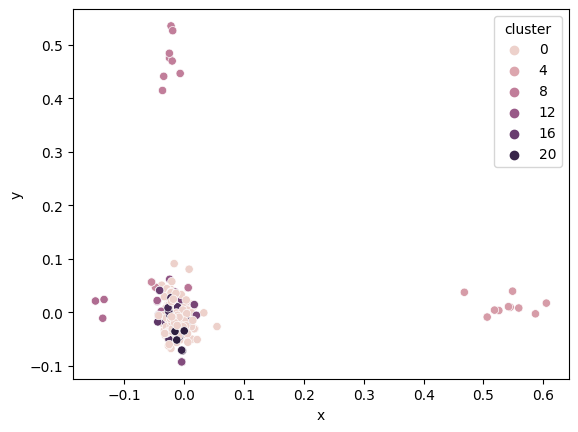

In [77]:
plot_clustering(filtered_data, filtered_labels)

k-means

In [6]:
from sklearn.cluster import KMeans

In [9]:
kMeans = KMeans(n_clusters=4)
clusters = kMeans.fit_predict(full_dataset_tfidf)
get_sihlouette(clusters, full_dataset_tfidf)

/Users/rubenagazzi/miniforge3/envs/tensorflow/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Sihlouette is equal to 0.01724158677363557


In [80]:
joblib.dump(clusters, './clustering_kmeans.save')

['./clustering_kmeans.save']

<class 'str'>


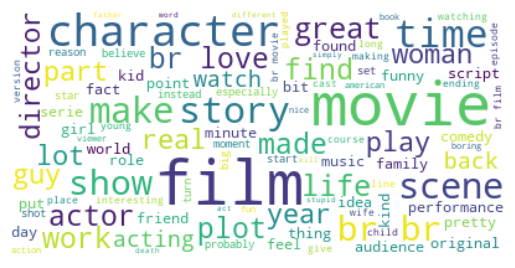

<class 'str'>


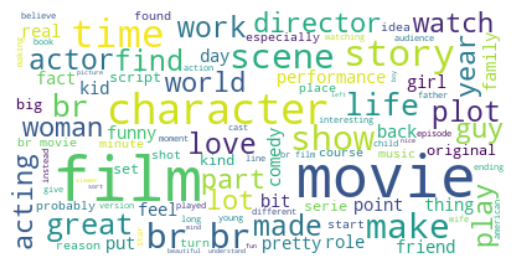

<class 'str'>


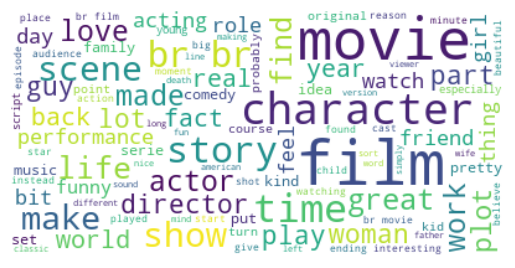

<class 'str'>


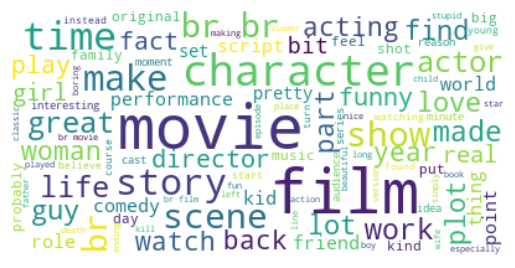

In [81]:
plot_word_cloud_data(full_dataframe, clusters)

(50000, 2)


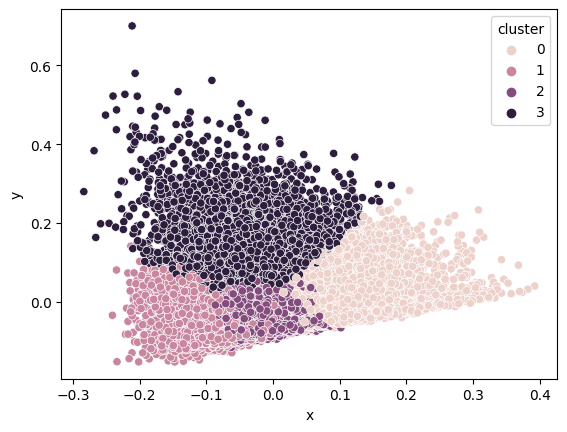

In [13]:
plot_clustering(full_dataset_tfidf, clusters)